<div class="alert alert-block alert-success">
<h1>Source Flow</h1>
</div>

<p style="font-size:17px; color:black; text-align:justify">
Consider a two-dimensional, incompressible flow where all the streamlines are straight lines emanating from a central point $O$. Moreover, let the velocity along each of the streamlines vary inversely with distance from point O. Such a flow is called a source flow.
</p>

<p style="font-size:17px; color:black; text-align:justify">
The stream function for this flow: 
    $$\Psi =\frac{\Lambda}{2 \pi}\theta$$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
The potential function for this flow: 
    $$\phi = \frac{\Lambda}{2 \pi} \ln r $$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
Below are the stream function $\psi$ and potential function $\phi$ plots (1D/2D) in the domain: $(x,y)\in[-10,10]^2$
</p> 

<p style="font-size:17px; color:red; text-align:justify">The last plot is interactive! </p> 

In [1]:
# HIDDEN
# General Purpose
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Jupyter Specifics
from IPython.display import HTML
#from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout


%matplotlib inline
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [2]:
# HIDDEN
# Set range
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y)

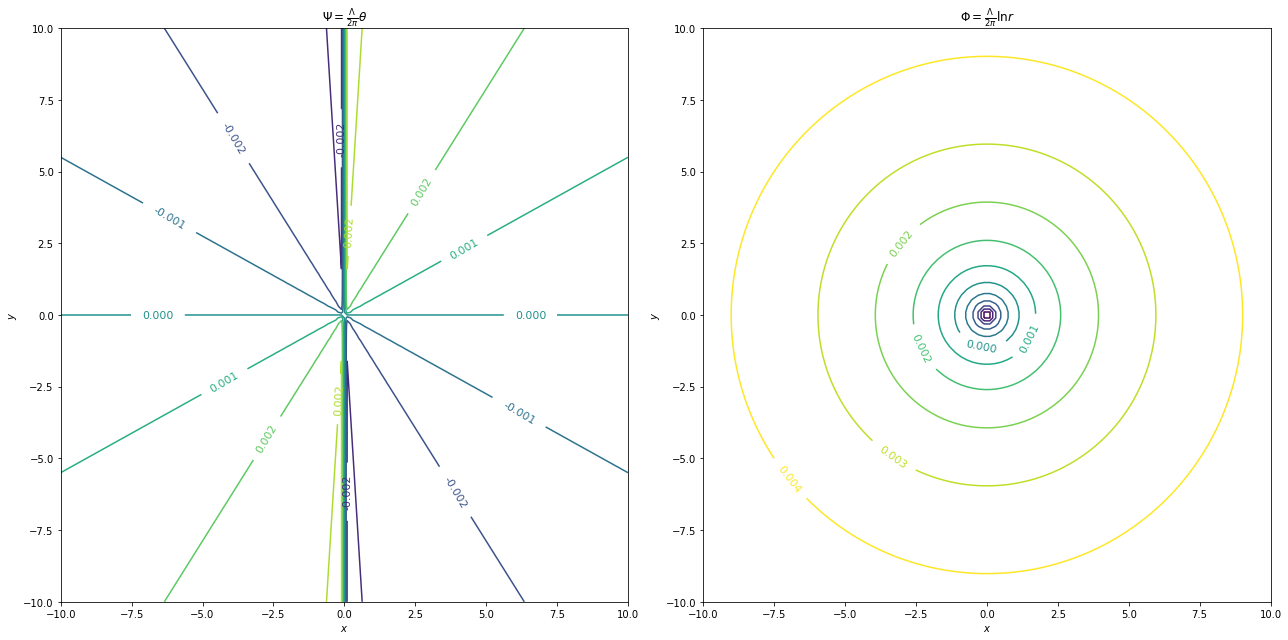

In [3]:
# HIDDEN
# Source Flow

# Set freestream velocity
#Lambda = 2 * np.pi #  Set for convenience

Lambda = 0.01

plt.rcParams["figure.figsize"] = (18,9)

plt.subplot(1,2,1)
Z = (Lambda)/(2 * np.pi) * np.arctan(Y/X)
#Z=(Lambda)/(2 * np.pi) * np.arctan2(Y,X)
levels = np.linspace(np.min(Z),0.0035,11)
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)
#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Psi =\frac{\Lambda}{2 \pi}\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.subplot(1,2,2)
Z = (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
levels = np.linspace(np.min(Z),0.0035,11)


CS = plt.contour(X, Y, Z, levels=levels)
#CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)


plt.title(r'$\Phi = \frac{\Lambda}{2 \pi} \ln r $')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show()

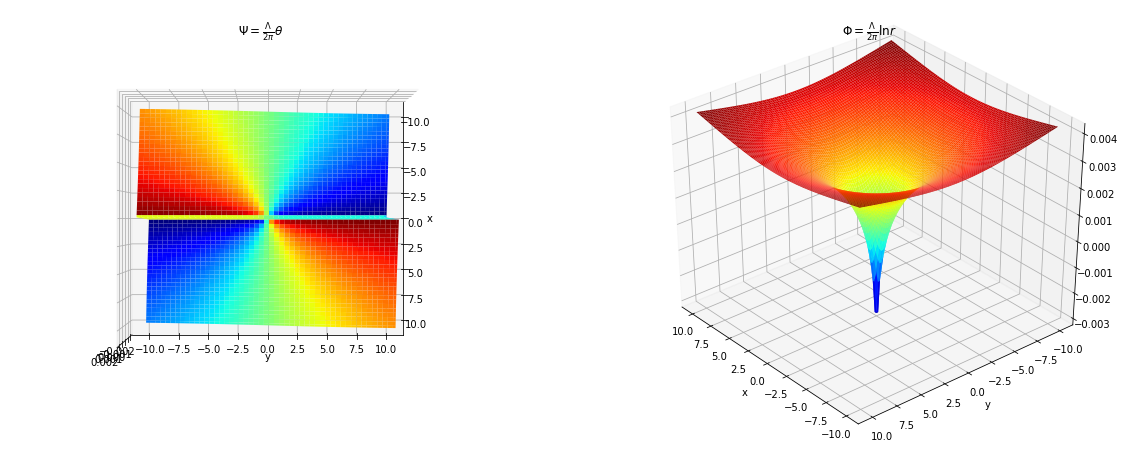

In [4]:
# HIDDEN
# Make data.
 # Set range
plt.rcParams["figure.figsize"] = (20,8)
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y) 

Vinf = 1
Lambda = 0.01
Z = (Lambda)/(2 * np.pi) * np.arctan(Y/X)
Z2 = (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.title(r'$\Psi =\frac{\Lambda}{2 \pi}\theta$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(90, 0)

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet)
plt.title(r'$\Phi = \frac{\Lambda}{2 \pi} \ln r $')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(35, 140)
plt.show()

In [5]:
# HIDDEN
# Source Flow interactive chart

def sourcePlot(C, C2, Lambda):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
    
    #Lambda = 0.05
    
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = (Lambda)/(2 * np.pi) * np.arctan(Y/X)
    #Z=(Lambda)/(2 * np.pi) * np.arctan2(Y,X)
    CS = plt.contour(X, Y, Z, levels=[C])
    plt.clabel(CS, inline=1, fontsize=16)

    Z = (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=16)
    
#     plt.title(r'$\Psi =\frac{\Lambda}{2 \pi}\theta$ and $\Phi = \frac{\Lambda}{2 \pi} \ln r $')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

In [6]:
# HIDDEN
interactive_plot = interactive(sourcePlot, 
                               C=widgets.FloatSlider(value=0.001,min=-0.01,max=0.01,step=0.00025,description=r'$\Psi=\frac{\Lambda}{2 \pi}\theta$', style=style, layout=slider_layout), 
                               C2=widgets.FloatSlider(value=0.005,min=-0.01,max=0.01,step=0.00025,description=r'$\Phi= \frac{\Lambda}{2 \pi} \ln r $', style=style, layout=slider_layout), 
                               Lambda=widgets.FloatSlider(value=0.03,min=0.01,max=0.1,step=0.01,description=r'$\Lambda$', style=style, layout=slider_layout));

interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot

interactive(children=(FloatSlider(value=0.001, description='$\\Psi=\\frac{\\Lambda}{2 \\pi}\\theta$', layout=L…